<center><img src="prog_lang.jpg" width=500></center>

How can you determine which programming languages and technologies are most widely used? Which languages are gaining or losing popularity, helping you decide where to focus your efforts?

One excellent data source is Stack Overflow, a programming question-and-answer site with more than 16 million questions on programming topics. Each Stack Overflow question is tagged with a label identifying its topic or technology. By counting the number of questions related to each technology, you can estimate the popularity of different programming languages.

In this project, you will use data from the Stack Exchange Data Explorer to examine how the relative popularity of R, Python, Java, and JavaScript has changed over time.

You'll work with a dataset containing one observation per tag per year, including the number of questions for that tag and the total number of questions that year.

`stack_overflow_data.csv`
|Column|Description|
|------|-----------|
|`year`|The year the question was asked (2008-2020)|
|`tag`|A word or phrase that describes the topic of the question|
|`num_questions`|The number of questions with a certain tag in that year|
|`year_total`|The total number of questions asked in that year|

In [57]:
# Load necessary packages
library(readr)
library(dplyr)
library(ggplot2)

In [58]:
# Load the dataset
data <- read_csv("stack_overflow_data.csv")

Rows: 420066 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tag
dbl (3): year, num_questions, year_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [59]:
# Start coding here
# Use as many cells as you like!

#To start let's look at the structure of the dataframe and the data frame itself

In [60]:
str(data)
head(data)

spc_tbl_ [420,066 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ year         : num [1:420066] 2008 2008 2008 2008 2008 ...
 $ tag          : chr [1:420066] "treeview" "scheduled-tasks" "specifications" "rendering" ...
 $ num_questions: num [1:420066] 69 30 21 35 6 1 159 10 4 20 ...
 $ year_total   : num [1:420066] 168541 168541 168541 168541 168541 ...
 - attr(*, "spec")=
  .. cols(
  ..   year = col_double(),
  ..   tag = col_character(),
  ..   num_questions = col_double(),
  ..   year_total = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


year tag             num_questions year_total
1 2008 treeview        69            168541    
2 2008 scheduled-tasks 30            168541    
3 2008 specifications  21            168541    
4 2008 rendering       35            168541    
5 2008 http-post        6            168541    
6 2008 static-assert    1            168541

## The structure of the columns all look correct.

# Lets start by looking at the popularity of each tag by year. 

We'll do this by  grouping the data by year, then creating a column calculating the proportion of the years total questions by tag

In [61]:
library(dplyr)

popularity <- data %>%
  mutate(fraction = (num_questions / year_total)*100) %>%
  arrange(desc(fraction))

popularity

year tag                    num_questions year_total fraction    
1      2020 python                 258911        5452545    4.748443    
2      2009 c#                      46020         981124    4.690539    
3      2008 c#                       7479         168541    4.437496    
4      2019 python                 234161        5410632    4.327794    
5      2016 javascript             264379        6593600    4.009631    
6      2017 javascript             250268        6342517    3.945878    
7      2015 javascript             256039        6612772    3.871886    
8      2010 c#                      75377        1970729    3.824828    
9      2018 javascript             208975        5621997    3.717096    
10     2014 javascript             236386        6431458    3.675465    
11     2018 python                 206560        5621997    3.674139    
12     2019 javascript             196770        5410632    3.636729    
13     2020 javascript             197203        5452545    3.616715    
14     2008 .net                     5886         168541    3.492325    
15     2014 java                   217887        6431458    3.387832    
16     2015 java                   215652        6612772    3.261144    
17     2011 c#                     112836        3473395    3.248580    
18     2013 javascript             196047        6037170    3.247333    
19     2013 java                   190996        6037170    3.163668    
20     2017 python                 192229        6342517    3.030800    
21     2012 java                   144722        4787010    3.023223    
22     2016 java                   197038        6593600    2.988322    
23     2012 c#                     138510        4787010    2.893455    
24     2011 java                    98976        3473395    2.849546    
25     2012 javascript             136276        4787010    2.846787    
26     2014 php                    179147        6431458    2.785480    
27     2013 php                    167734        6037170    2.778355    
28     2011 php                     96140        3473395    2.767897    
29     2010 java                    54383        1970729    2.759537    
30     2012 php                    131881        4787010    2.754976    
⋮      ⋮    ⋮                      ⋮             ⋮          ⋮           
420037 2015 graph-reduction        1             6612772    1.512225e-05
420038 2015 cfcache                1             6612772    1.512225e-05
420039 2015 boost-coroutine2       1             6612772    1.512225e-05
420040 2015 as-pattern             1             6612772    1.512225e-05
420041 2015 api-gateway            1             6612772    1.512225e-05
420042 2015 spoken-language        1             6612772    1.512225e-05
420043 2015 simian                 1             6612772    1.512225e-05
420044 2015 metaweblog             1             6612772    1.512225e-05
420045 2015 enterprise-web-library 1             6612772    1.512225e-05
420046 2015 keyfilter              1             6612772    1.512225e-05
420047 2015 jssh                   1             6612772    1.512225e-05
420048 2015 vehicle-routing        1             6612772    1.512225e-05
420049 2015 fannj                  1             6612772    1.512225e-05
420050 2015 unjar                  1             6612772    1.512225e-05
420051 2015 helcim-gateway         1             6612772    1.512225e-05
420052 2015 simple-machines-forum  1             6612772    1.512225e-05
420053 2015 delve                  1             6612772    1.512225e-05
420054 2015 ngrx                   1             6612772    1.512225e-05
420055 2015 valhooks               1             6612772    1.512225e-05
420056 2015 verity                 1             6612772    1.512225e-05
420057 2015 mapsvg                 1             6612772    1.512225e-05
420058 2015 placeholder-control    1             6612772    1.512225e-05
420059 2015 laravel-envoyer        1             6612772    1.512

# Next let's answer the questions


## Has R been shrinking over time?
To answer this we already have calculated the percent of total questions with the tag R, we just need to filter it!

In [62]:
r_over_time <- popularity %>%
filter(tag=="r")

r_over_time

year tag num_questions year_total fraction  
1  2020 r   52662         5452545    0.96582422
2  2019 r   52249         5410632    0.96567277
3  2018 r   52288         5621997    0.93006097
4  2017 r   51061         6342517    0.80505894
5  2016 r   44365         6593600    0.67284943
6  2015 r   40704         6612772    0.61553612
7  2014 r   30923         6431458    0.48080855
8  2013 r   22256         6037170    0.36864955
9  2012 r   12183         4787010    0.25450124
10 2011 r    5835         3473395    0.16799126
11 2010 r    2264         1970729    0.11488135
12 2009 r     523          981124    0.05330621
13 2008 r       8          168541    0.00474662

### Looks like R has been increasing!
 Let's confirm this by graphing fraction vs year

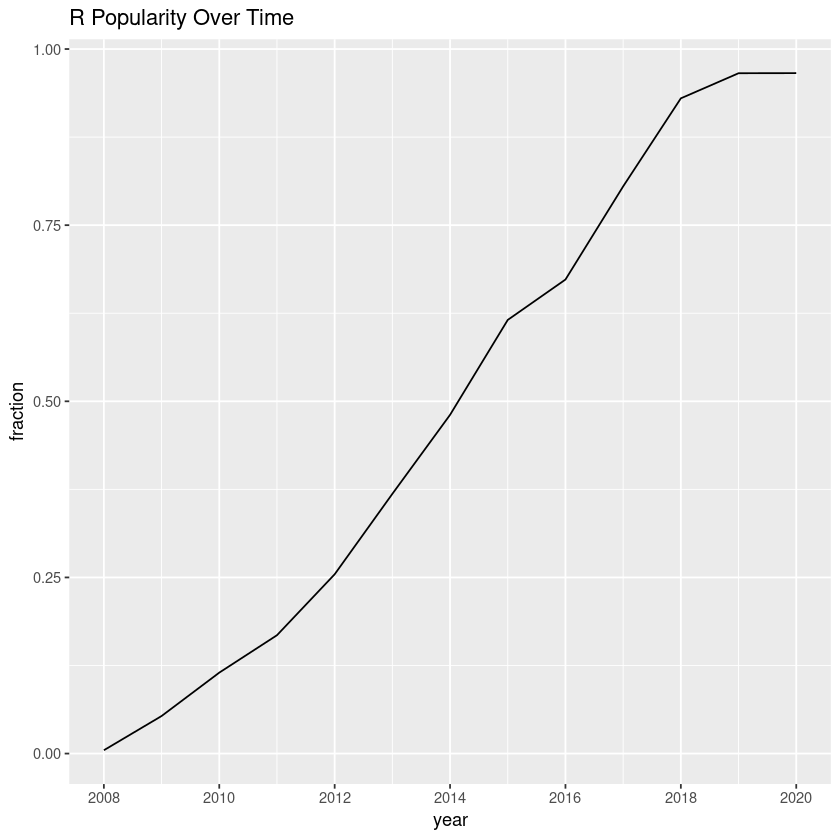

In [63]:
ggplot(r_over_time, aes(year, fraction))+
geom_line()+
ggtitle("R Popularity Over Time")+
scale_x_continuous(breaks=c(2008,2010,2012,2014,2016,2018,2020))

# Now lets answer the next question

## 2. What fraction of the total number of questions asked in 2020 had the R tag?
To find this we can start by using the r_over_time data frame and filtering it to 2020. Then we need to transform the fraction into a percentage

In [64]:
q2 <- r_over_time %>% 
filter(year==2020) %>%
mutate (percentage= fraction)

q2

year tag num_questions year_total fraction  percentage
1 2020 r   52662         5452545    0.9658242 0.9658242

### The percentage is 0.9658.
Now we need to save that as a variable

In [65]:
r_percentage <-0.9658

r_percentage

[1] 0.9658

# Now we can answer question 3.
we'll start by using the popularity data frame and filtering it to 2015-2020. Next we'll add up the total amount of questions for that time frame. 

In [66]:
q3 <- popularity %>%
filter(year>=2015) %>%
group_by (tag)%>%
mutate (total_qs= sum(year_total))

q3

New names:
• `` -> `...1`


year tag                    num_questions year_total fraction    
1      2020 python                 258911        5452545    4.748443    
2      2019 python                 234161        5410632    4.327794    
3      2016 javascript             264379        6593600    4.009631    
4      2017 javascript             250268        6342517    3.945878    
5      2015 javascript             256039        6612772    3.871886    
6      2018 javascript             208975        5621997    3.717096    
7      2018 python                 206560        5621997    3.674139    
8      2019 javascript             196770        5410632    3.636729    
9      2020 javascript             197203        5452545    3.616715    
10     2015 java                   215652        6612772    3.261144    
11     2017 python                 192229        6342517    3.030800    
12     2016 java                   197038        6593600    2.988322    
13     2017 java                   174685        6342517    2.754190    
14     2018 java                   146226        5621997    2.600962    
15     2015 php                    171521        6612772    2.593784    
16     2015 android                163793        6612772    2.476919    
17     2019 java                   132797        5410632    2.454371    
18     2016 php                    161776        6593600    2.453531    
19     2016 android                159838        6593600    2.424139    
20     2016 python                 158624        6593600    2.405727    
21     2015 c#                     155054        6612772    2.344766    
22     2016 c#                     149208        6593600    2.262922    
23     2017 php                    141901        6342517    2.237298    
24     2017 android                135869        6342517    2.142194    
25     2020 java                   116349        5452545    2.133848    
26     2017 c#                     131842        6342517    2.078702    
27     2015 python                 137353        6612772    2.077087    
28     2015 html                   132794        6612772    2.008144    
29     2015 jquery                 128429        6612772    1.942136    
30     2018 c#                     109175        5621997    1.941926    
⋮      ⋮    ⋮                      ⋮             ⋮          ⋮           
246922 2015 graph-reduction        1             6612772    1.512225e-05
246923 2015 cfcache                1             6612772    1.512225e-05
246924 2015 boost-coroutine2       1             6612772    1.512225e-05
246925 2015 as-pattern             1             6612772    1.512225e-05
246926 2015 api-gateway            1             6612772    1.512225e-05
246927 2015 spoken-language        1             6612772    1.512225e-05
246928 2015 simian                 1             6612772    1.512225e-05
246929 2015 metaweblog             1             6612772    1.512225e-05
246930 2015 enterprise-web-library 1             6612772    1.512225e-05
246931 2015 keyfilter              1             6612772    1.512225e-05
246932 2015 jssh                   1             6612772    1.512225e-05
246933 2015 vehicle-routing        1             6612772    1.512225e-05
246934 2015 fannj                  1             6612772    1.512225e-05
246935 2015 unjar                  1             6612772    1.512225e-05
246936 2015 helcim-gateway         1             6612772    1.512225e-05
246937 2015 simple-machines-forum  1             6612772    1.512225e-05
246938 2015 delve                  1             6612772    1.512225e-05
246939 2015 ngrx                   1             6612772    1.512225e-05
246940 2015 valhooks               1             6612772    1.512225e-05
246941 2015 verity                 1             6612772    1.512225e-05
246942 2015 mapsvg                 1             6612772    1.512225e-05
246943 2015 placeholder-control    1             6612772    1.512225e-05
246944 2015 laravel-envoyer        1             6612772    1.512

## Now lets calculate the number of questions for each tag in the data frame
We'll do this by grouping the data by tag then calculating the sum of num_questions. 

In [67]:
q3 <- q3 %>%
group_by (tag) %>%
mutate(tag_total=sum(num_questions)) 

q3

New names:
• `` -> `...1`


year tag                    num_questions year_total fraction    
1      2020 python                 258911        5452545    4.748443    
2      2019 python                 234161        5410632    4.327794    
3      2016 javascript             264379        6593600    4.009631    
4      2017 javascript             250268        6342517    3.945878    
5      2015 javascript             256039        6612772    3.871886    
6      2018 javascript             208975        5621997    3.717096    
7      2018 python                 206560        5621997    3.674139    
8      2019 javascript             196770        5410632    3.636729    
9      2020 javascript             197203        5452545    3.616715    
10     2015 java                   215652        6612772    3.261144    
11     2017 python                 192229        6342517    3.030800    
12     2016 java                   197038        6593600    2.988322    
13     2017 java                   174685        6342517    2.754190    
14     2018 java                   146226        5621997    2.600962    
15     2015 php                    171521        6612772    2.593784    
16     2015 android                163793        6612772    2.476919    
17     2019 java                   132797        5410632    2.454371    
18     2016 php                    161776        6593600    2.453531    
19     2016 android                159838        6593600    2.424139    
20     2016 python                 158624        6593600    2.405727    
21     2015 c#                     155054        6612772    2.344766    
22     2016 c#                     149208        6593600    2.262922    
23     2017 php                    141901        6342517    2.237298    
24     2017 android                135869        6342517    2.142194    
25     2020 java                   116349        5452545    2.133848    
26     2017 c#                     131842        6342517    2.078702    
27     2015 python                 137353        6612772    2.077087    
28     2015 html                   132794        6612772    2.008144    
29     2015 jquery                 128429        6612772    1.942136    
30     2018 c#                     109175        5621997    1.941926    
⋮      ⋮    ⋮                      ⋮             ⋮          ⋮           
246922 2015 graph-reduction        1             6612772    1.512225e-05
246923 2015 cfcache                1             6612772    1.512225e-05
246924 2015 boost-coroutine2       1             6612772    1.512225e-05
246925 2015 as-pattern             1             6612772    1.512225e-05
246926 2015 api-gateway            1             6612772    1.512225e-05
246927 2015 spoken-language        1             6612772    1.512225e-05
246928 2015 simian                 1             6612772    1.512225e-05
246929 2015 metaweblog             1             6612772    1.512225e-05
246930 2015 enterprise-web-library 1             6612772    1.512225e-05
246931 2015 keyfilter              1             6612772    1.512225e-05
246932 2015 jssh                   1             6612772    1.512225e-05
246933 2015 vehicle-routing        1             6612772    1.512225e-05
246934 2015 fannj                  1             6612772    1.512225e-05
246935 2015 unjar                  1             6612772    1.512225e-05
246936 2015 helcim-gateway         1             6612772    1.512225e-05
246937 2015 simple-machines-forum  1             6612772    1.512225e-05
246938 2015 delve                  1             6612772    1.512225e-05
246939 2015 ngrx                   1             6612772    1.512225e-05
246940 2015 valhooks               1             6612772    1.512225e-05
246941 2015 verity                 1             6612772    1.512225e-05
246942 2015 mapsvg                 1             6612772    1.512225e-05
246943 2015 placeholder-control    1             6612772    1.512225e-05
246944 2015 laravel-envoyer        1             6612772    1.512

## Let's clean up this data frame.
 we no longer need the year, year_total, num_questions, or fraction column. Let's also pull only unique values 

In [68]:
q3<- q3 %>%
select(tag, total_qs, tag_total) %>%
arrange(desc(tag_total)) %>%
unique()

q3

New names:
• `` -> `...1`


tag                    total_qs tag_total
1     javascript             36034063 1373634  
2     python                 36034063 1187838  
3     java                   36034063  982747  
4     android                36034063  737330  
5     c#                     36034063  730045  
6     php                    36034063  723982  
7     html                   36034063  622827  
8     jquery                 36034063  459983  
9     css                    36034063  410852  
10    c++                    36034063  367152  
11    ios                    36034063  360245  
12    mysql                  36034063  328074  
13    sql                    36034063  312761  
14    r                      36034063  293329  
15    node.js                36034063  291998  
16    swift                  36034063  263782  
17    reactjs                36034063  249035  
18    python-3.x             36034063  237800  
19    angular                36034063  233410  
20    arrays                 36034063  229314  
21    json                   36034063  207442  
22    angularjs              36034063  196047  
23    c                      36034063  181356  
24    sql-server             36034063  178349  
25    excel                  36034063  174486  
26    django                 36034063  163264  
27    pandas                 36034063  162461  
28    laravel                36034063  143354  
29    ruby-on-rails          36034063  139880  
30    vba                    36034063  136144  
⋮     ⋮                      ⋮        ⋮        
57182 document-oriented      6612772  1        
57183 mpavcontroller         6612772  1        
57184 versioncake            6612772  1        
57185 twist                  6612772  1        
57186 restivejs              6612772  1        
57187 realityserver          6612772  1        
57188 pminstall              6612772  1        
57189 zoe                    6612772  1        
57190 spread-toolkit         6612772  1        
57191 search-snippet         6612772  1        
57192 threads-a-gogo         6612772  1        
57193 fbrequest-form         6612772  1        
57194 pysvg                  6612772  1        
57195 sjersey                6612772  1        
57196 xrds                   6612772  1        
57197 openstacknetsdk        6612772  1        
57198 greasyspoon            6612772  1        
57199 actionlist             6612772  1        
57200 rococoa                6612772  1        
57201 helpextract            6612772  1        
57202 mvg                    6612772  1        
57203 onionkit               6612772  1        
57204 saratoga               6612772  1        
57205 jtmpl                  6612772  1        
57206 mqlwrite               6612772  1        
57207 zend-xmlrpc            6612772  1        
57208 grails-maven           6612772  1        
57209 enterprise-web-library 6612772  1        
57210 helcim-gateway         6612772  1        
57211 valhooks               6612772  1

## The five most popular tags are javascript, phyth android, c#, java, and jquery
Let's make them into a vector

In [69]:
highest_tags<- c("javascript", "python","java","android", "c#")

highest_tags

[1] "javascript" "python"     "java"       "android"    "c#"

# Now onto the final question


# 4. Which tag experienced the largest year-over-year increase in its fraction of questions?
We can use the popularity data frame which already has the fractions of tag questions per year

## First we need to calculate the ratio of the fraction for each tag
We do this by arranging the data by tag and year then grouping the data by tag. Next we'll add a colum that diivides that year's fraction with the previous year's fraction. Finally we'll ungroup the dataset and sort in decesending order

In [70]:
q4 <- popularity %>%
arrange(tag, year) %>%
group_by (tag) %>%
mutate (growth_ratio=fraction/lag(fraction))%>%
ungroup() %>%
arrange(desc(growth_ratio))

q4

year tag                      num_questions year_total fraction    
1      2019 swiftui                  3546          5410632    0.06553763  
2      2017 laravel-5.4              3455          6342517    0.05447364  
3      2018 angular6                 4849          5621997    0.08625049  
4      2015 laravel-5.1              2330          6612772    0.03523485  
5      2014 ios8                     5485          6431458    0.08528393  
6      2019 ios13                    1601          5410632    0.02958989  
7      2016 laravel-5.3              1540          6593600    0.02335598  
8      2012 ruby-on-rails-3.2        2001          4787010    0.04180062  
9      2016 react-redux              1394          6593600    0.02114171  
10     2012 ios6                     3291          4787010    0.06874855  
11     2017 xcode9                   1136          6342517    0.01791087  
12     2020 cnn                       956          5452545    0.01753310  
13     2010 ios4                     2187          1970729    0.11097416  
14     2018 asp.net-core-2.1          880          5621997    0.01565280  
15     2010 ipad                     3917          1970729    0.19875894  
16     2011 entity-framework-4.1     1702          3473395    0.04900105  
17     2017 ios11                    1832          6342517    0.02888443  
18     2014 android-5.0-lollipop     1014          6431458    0.01576625  
19     2016 ios10                    1843          6593600    0.02795135  
20     2012 google-drive-api         1101          4787010    0.02299974  
21     2013 laravel-4                2959          6037170    0.04901303  
22     2019 laravel-6                 655          5410632    0.01210579  
23     2014 xcode6                   3225          6431458    0.05014415  
24     2016 firebase-cloud-messaging 1489          6593600    0.02258250  
25     2012 xcode4.3                  993          4787010    0.02074364  
26     2017 phonegap                  666          6342517    0.01050056  
27     2016 ubuntu-16.04              747          6593600    0.01132917  
28     2019 asp.net-core-3.0          637          5410632    0.01177312  
29     2016 xcode8                   1973          6593600    0.02992296  
30     2015 swift2                   4013          6612772    0.06068559  
⋮      ⋮    ⋮                        ⋮             ⋮          ⋮           
420037 2013 zumero                    9            6037170    1.490765e-04
420038 2016 zumero-datagrid           1            6593600    1.516622e-05
420039 2016 zumo                      3            6593600    4.549867e-05
420040 2008 zune                      2             168541    1.186655e-03
420041 2009 zune-hd                   3             981124    3.057717e-04
420042 2012 zuora                     1            4787010    2.088987e-05
420043 2014 zuora-soap                2            6431458    3.109715e-05
420044 2010 zurb-foundation           1            1970729    5.074264e-05
420045 2013 zurb-foundation-5         2            6037170    3.312810e-05
420046 2015 zurb-foundation-6        36            6612772    5.444010e-04
420047 2015 zurb-foundation-apps     21            6612772    3.175673e-04
420048 2013 zurb-ink                  4            6037170    6.625621e-05
420049 2013 zurb-joyride             15            6037170    2.484608e-04
420050 2014 zurb-reveal              19            6431458    2.954229e-04
420051 2015 zurmocrm                  2            6612772    3.024450e-05
420052 2018 zuul-ci                   1            5621997    1.778727e-05
420053 2016 zuul-testing              1            6593600    1.516622e-05
420054 2019 zwcad                     1            5410632    1.848213e-05
420055 2011 zwoptex                   4            3473395    1.151611e-04
420056 2009 zx81                      1             981124    1.019239e-04
420057 2017 zxcvbn                    1            6342517    1.576661e-05
420058 2009 zxing               

## Now we just need to store swiftui as a vector

In [71]:
highest_ratio_tag <-"swiftui"

highest_ratio_tag

[1] "swiftui"